# Contextily in CoCalc

This follows http://geopandas.org/gallery/plotting_basemap_background.html

In [1]:
import contextily as ctx
from pkg_resources import get_distribution
get_distribution('contextily').version

'0.99.0'

In [2]:
import geopandas

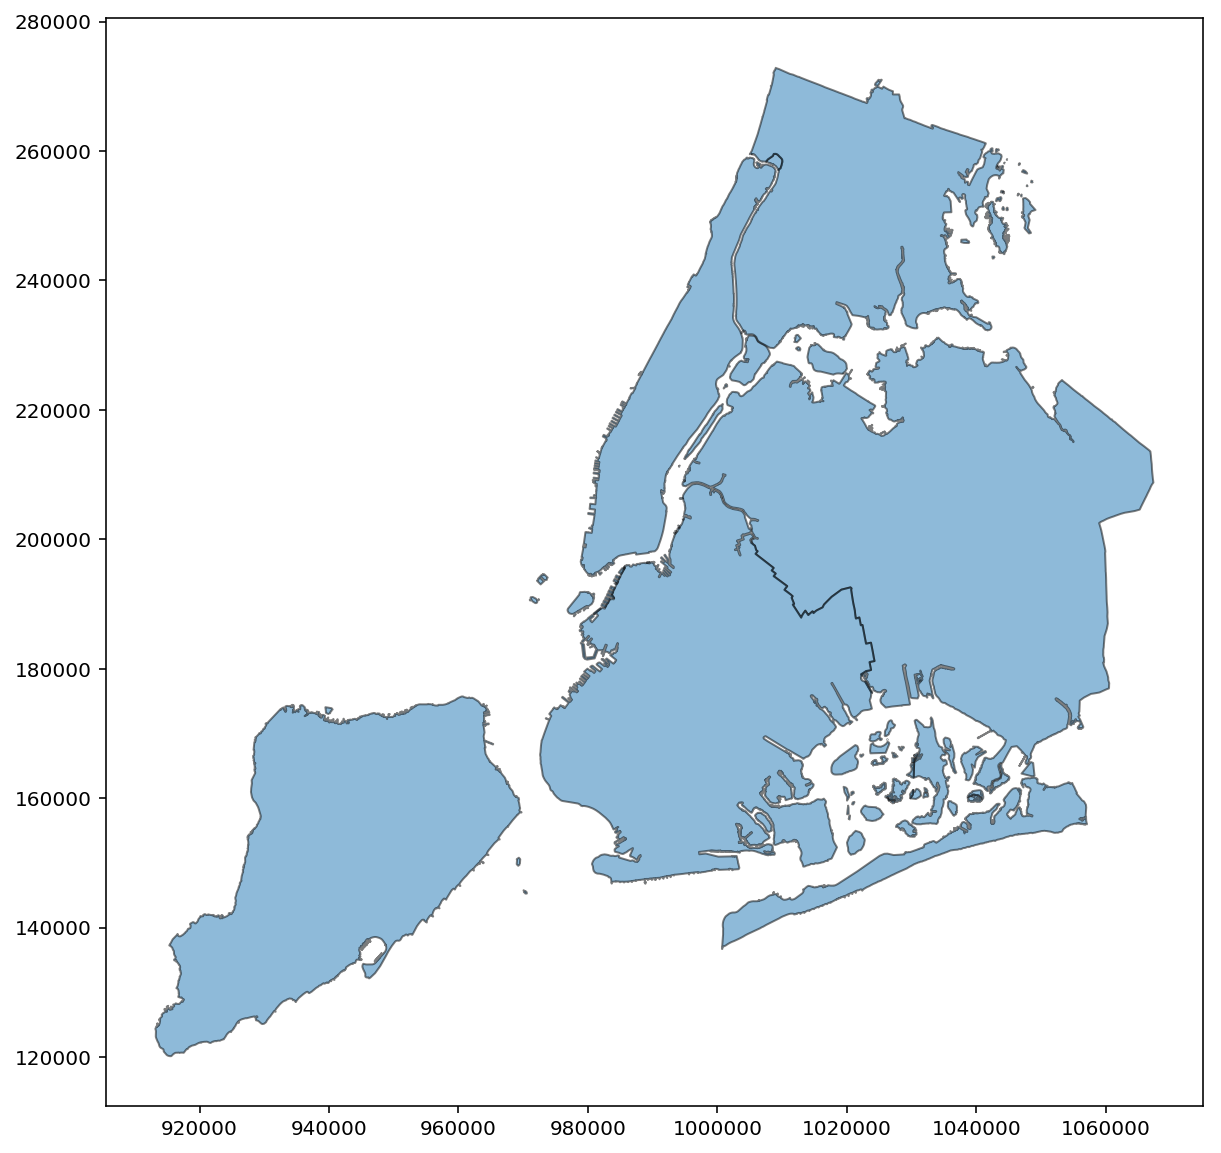

In [3]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [4]:
df = df.to_crs(epsg=3857)

In [5]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))


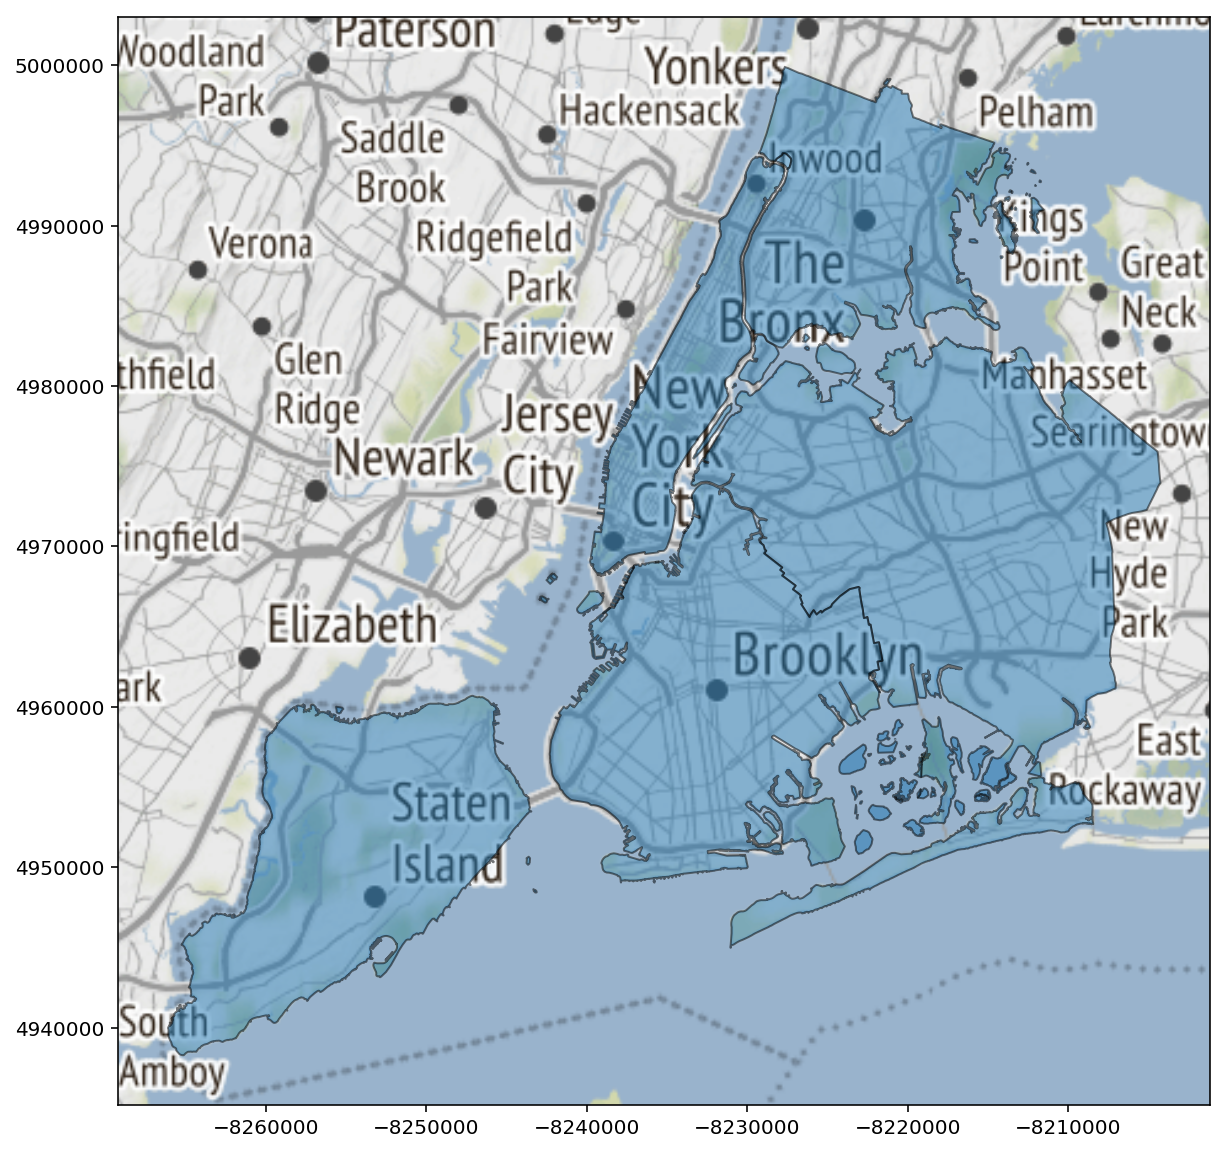

In [6]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10)

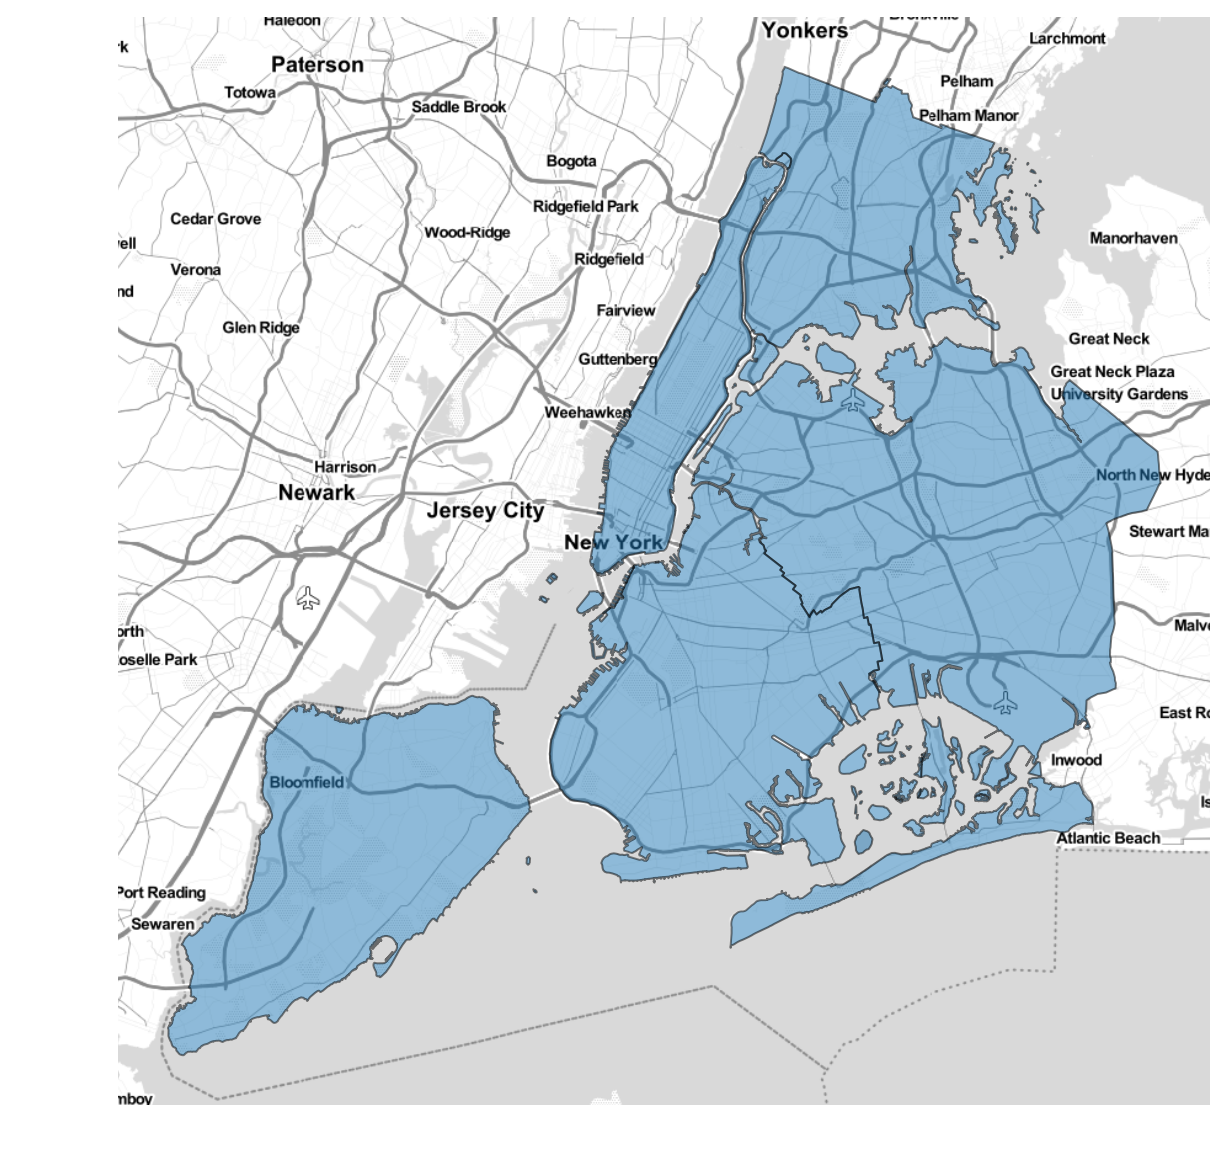

In [8]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()